In [1]:
import pandas as pd
import sklearn
import scipy
import numpy as np
import matplotlib.pyplot as plt
from html_sanitizer import Sanitizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import random as rnd
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
link_rec_words = "https://ru.wiktionary.org/wiki/%D0%9F%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5:%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%BD%D1%8B%D1%85_%D1%81%D0%BB%D0%BE%D0%B2_%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0_(2013)"

In [3]:
train = pd.read_csv("train_groups.csv")

In [4]:
test = pd.read_csv("test_groups.csv")

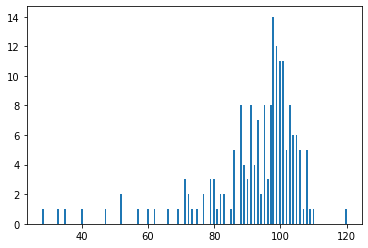

In [5]:
a = np.unique(test.group_id, return_counts=True)

plt.hist(a[1], bins=180)
plt.draw()

In [6]:
train.groupby("group_id")["pair_id"].count().shape

(129,)

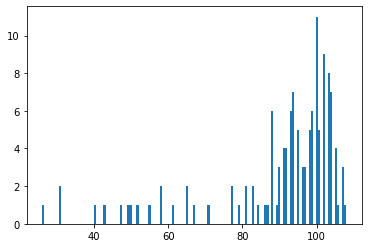

In [7]:
plt.hist(train.groupby("group_id")["pair_id"].count(), bins=129)
plt.draw()

In [8]:
train.head()

pair_id  group_id  doc_id  target
0        1         1   15731       0
1        2         1   14829       0
2        3         1   15764       0
3        4         1   17669       0
4        5         1   14852       0

In [9]:
all_in_group = train.groupby("group_id")["pair_id"].count()

In [10]:
false_in_group = train.groupby("group_id")["target"].sum()

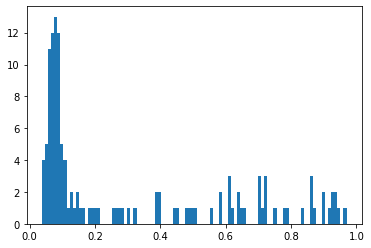

In [11]:
ar = np.array(false_in_group) / np.array(all_in_group)
plt.hist(ar,bins=100)
plt.draw()

In [12]:
from bs4 import BeautifulSoup
import urllib

In [13]:
text = ""
with urllib.request.urlopen(link_rec_words) as fp: 
    mybytes = fp.read()
    text = mybytes.decode("utf8")
    

In [14]:
bs = BeautifulSoup("".join(text.replace("\n","")))

In [15]:
bs = bs.find("tbody")


In [16]:
all_typ = []
all_word = []
cnt = 0
for st in bs.find_all("tr"):
    if cnt == 0:
        cnt+=1
        continue
    lis = st.contents#[<td>1</td>, <td><a href="/wiki/%D0%B8" title="и">и</a></td>, <td>союз</td>]
    typ = lis[2].contents[0]
    word = lis[1].contents[0].contents[0]
    
    all_typ.append(typ)
    all_word.append(word)

In [17]:
data = pd.DataFrame(np.array([all_word,all_typ]).T,columns=["word", "type"])

In [18]:
data.head()

word         type
0    и         союз
1    в      предлог
2   не      частица
3   на      предлог
4    я  местоимение

In [19]:
data = pd.DataFrame(data)

In [20]:
data.type.unique()

array(['союз', 'предлог', 'частица', 'местоимение', 'глагол',
       'существительное', 'наречие', 'числительное', 'прилагательное',
       'существительноесоюз', 'междометие'], dtype=object)

In [24]:
words = np.array(data[(data["type"] == "союз") 
     | (data["type"] == "предлог")
     | (data["type"] == "частица")
     | (data["type"] == "местоимение")
     | (data["type"] == "числительное")
     | (data["type"] == "междометие")]["word"])

In [25]:
with open("words.txt", "w") as f:
    print(*words, file=f)

In [26]:
import os

In [28]:
text = ""
with open(path + "1.dat", "r") as f:
    text = f.readlines()
    

Важны слова из ссылок

ссылки

слова из жирных тегов

In [29]:
bs = BeautifulSoup("".join(text).replace("\n", ""))

In [30]:
all_links = bs.find_all("a")

In [31]:
hrefs = list(map(lambda x: x.get("href"), all_links))

In [32]:
def f(x):
    if len(x) == 0:
        return ""
    else:
        return x.contents[0]
link_text = list(map(f, all_links))

In [33]:
link_text

['',
 '',
 '',
 '',
 '',
 '',
 '',
 'Скачать',
 'М. Б. Аншина Центр репродукции и генетики «ФертиМед», г. Москва',
 'Реферат',
 'Задачи лабораторной гормональной диагностики',
 'Этапы гормональной диагностики',
 'Аналитический этап',
 'Ответ: оснований для подозрения на наличие у больной аденомы гипофиза не было, поскольку опухоль сопровождается постоянно',
 'Ошибки в определении показаний',
 'Ошибка в определении показаний',
 'Ошибка в определении показаний',
 'Ошибка анализа',
 'Ошибка интерпретации',
 'Клиническая оценка гормонального статуса пациентки.',
 'Признаки, характеризующие самочувствие Гипотеза',
 'Приступы сердцебиения гиперфункция щитовидной железы',
 'Температура тела',
 'Нарушение мочеиспускания может быть признаком',
 'Особенности облика',
 'Сопутствующие заболевания',
 'к эндокринному бесплодию или сопутствующие ему Гипотеза Содержание Субстрат гормона',
 'Об определении уровней ЛГ, эстрадиола, прогестерона, тестостерона',
 'ЛГ. Считается, что соотношение ЛГ:ФСГ – би

In [34]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from nltk.stem import WordNetLemmatizer

In [35]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/evgeny/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:

lemmatizer = WordNetLemmatizer()


In [37]:

print(lemmatizer.lemmatize("Девочкины"))

Девочкины


In [38]:
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

In [39]:
text = "Приветствую тебя моя дорогая читательница человек"

In [40]:
def delete_symbols(text):
    res = ""
    text = text.lower()
    
    for i in text:
        t = i    
        if not(
                (t >= '0' and t <= '9') or 
                (t >= 'a' and t <= 'z') or
                (t >= 'а' and t <= 'я')
              ):
            t = ' '
            
        res += t
        
    return res 

In [41]:
def list2string(myList):  
    myStr = ""  
    
    for word in myList:
        #if word not in russian_stopwords:
        myStr += word
    
    return myStr

In [42]:
def stemming(text):
    text = delete_symbols(text)
    
    tokens = mystem.lemmatize(text)
    stri = list2string(tokens)
   
    return stri
    

In [43]:
stemming("Привет, медвед я в доме у  жены")

'привет  медведы я в дом у  жена\n'

In [44]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [45]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    
    title = stemming(title)
    
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [46]:
import numpy as np
y_train = []
X_train = []
groups_train = []
all_words = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        for j in title.strip().split():
            all_words.append(j)
        
        
        


In [47]:
len(all_words)

102250

In [48]:
all_words = np.unique(all_words)
all_words.shape

(15598,)

In [49]:
import numpy as np
y_train = []
X_train = []
groups_train = []
val = []
row = []
col = []
ln = 0
titles = [] 
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        
        y_train.append(target_id)
        groups_train.append(new_group)
        dict_words = dict.fromkeys(all_words, 0)
        
        for i in title.strip().split():
            dict_words[i] +=1
            
        dict_words = list(dict_words.values())
        
        for t in range(len(dict_words)):
            if dict_words[t] != 0:
                val.append(dict_words[t])
                row.append(ln)
                col.append(t)
                
        titles.append(title)
        
        ln+=1


KeyboardInterrupt: 

In [18]:
ln, len(titles)

(11690, 11690)

In [36]:

vectorizer = TfidfVectorizer()
X_train_vecrorizer = vectorizer.fit_transform(titles)


In [40]:
X_train_vecrorizer.todense()[X_train_vecrorizer.todense() != 0].shape

(1, 85769)

In [41]:
titles

['ваз 21213   замена подшипник ступица   нива\n',
 'ваз 2107 опт в сочи  сравнивать цена  купить потребительский товар на tiu ru\n',
 'купить ступица лад калина2  трансмиссия   переходный ступица цена  замена  тюнинг \n',
 'классика 21010   21074\n',
 'ступица нива   замена подшипник свой рука\n',
 'ваз 2110\n',
 'обзор подшипник полуось ваз 2101 07  2121 2123\n',
 'купить подшипник и ступица fag  страница 23 \n',
 'horsepowers   автомобильный интернет портал   отзыв владелец ваз 2121 нива 2007 год\n',
 'новость и сообщение из официальный группа вконтакте торговый компания 33 sport   магазин   тольятти\n',
 'инструкция по замена подшипник передняя ступица ивеко дейли через dorognoekam ru\n',
 'ступица   olx ua   страница 80\n',
 'маааленькая проблемка   бортжурнал авток 2160   1994 год на drive2\n',
 'разгружать полуось для нива  24 шлиц 765 мм \n',
 'прошивка для нива м7 9 7 скачать   файлообменник emqraty6 foxkirov ru\n',
 'страница 6  раздел  каталог   подвеска\n',
 'продавать нива 

In [42]:
X_train_vecrorizer = X_train_vecrorizer.todense()

In [43]:
y_train = np.array(y_train)
groups_train = np.array(groups_train)

In [44]:
len(val), len(row), len(col), ln

(94894, 94894, 94894, 11690)

In [45]:
X_train = scipy.sparse.csc_matrix((val, (row, col)), shape=(ln, len(all_words)))
X_train = X_train.todense()

print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15598) (11690,) (11690,)


In [46]:
X_train_vecrorizer.shape

(11690, 15534)

In [47]:
cl = sklearn.feature_extraction.text.TfidfTransformer()
cl.fit(X_train)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [63]:
X_train1  = cl.transform(X_train)
#X_train1 = X_train1.todense()

In [64]:
X_train1.shape

(11690, 15598)

In [66]:
X_train = X_train1.todense()

In [67]:
print(X_train.shape, X_train1.shape)

(11690, 15598) (11690, 15598)


In [66]:
scl = StandardScaler()
scl.fit(X_train_vecrorizer)
X_train_vecrorizer = scl.transform(X_train_vecrorizer)

In [1]:
alpha = 0.00000001
max_epoch = 200
C = 0.1
batch_size = 450
folds = 8

mean_roc_auc = 0
neigh = 55

for i in np.unique(groups_train):
    X_ = X_train_vecrorizer[groups_train == i]
    
    distMart = sklearn.metrics.pairwise_distances(X_, metric="cosine")
    #print(distMart)
    meanDist = np.sort(distMart, axis=1)[:,1:-1]
    print(meanDist)
    print(y_train[groups_train == i])
    
    
print(mean_roc_auc/folds)

NameError: name 'np' is not defined

In [85]:
folds = 8

mean_roc_auc = 0

for train_index, test_index in GroupKFold(n_splits=folds).split(X_train_vecrorizer, y_train, groups_train):
    #xTrain = get_sparse_submatr(np.array(val), np.array(row), np.array(col), train_index, (len(train_index), len(all_words)))
    xTrain = X_train_vecrorizer[train_index]
    yTrain = y_train[train_index]
    
    #xTest = get_sparse_submatr(np.array(val), np.array(row), np.array(col), test_index, (len(test_index), len(all_words)))
    yTest = y_train[test_index]
    xTest = X_train_vecrorizer[test_index]
    
    #print(X_train1.shape, xTrain.shape)
    clf = SGDClassifier(loss="log",alpha=0.0000000001 )
    
    clf.fit(xTrain, yTrain)
    a1 = clf.predict(xTest)
    print(roc_auc_score(yTest, a1))
    mean_roc_auc += roc_auc_score(yTest, a1)
print(mean_roc_auc/folds)

0.5151029418627536


KeyboardInterrupt: 

In [52]:
alpha = 0.0000000001
max_epoch = 500
C = 0.2
batch_size = 450
folds = 8
res = []
threeshold = 0.24
mean_roc_auc = 0
mean_f1 = 0
for train_index, test_index in GroupKFold(n_splits=folds).split(X_train, y_train, groups_train):
#     threeshold = 0.1
    xTrain = X_train_vecrorizer[train_index]
    yTrain = y_train[train_index]
    
    xTest = X_train_vecrorizer[test_index]
    yTest = y_train[test_index]
    
    clf = MySGDClassifier(batch_generator, C=C, max_epoch=max_epoch, 
                      model_type="log_reg",batch_size=batch_size)
    clf.fit(xTrain, yTrain)
    a1 = clf.predict(xTest)

    a2 = []
    for i in range(a1.shape[1]):
        a2.append(a1[0,i])
    a2 = np.array(a2)

    print("Roc ", roc_auc_score(yTest, a2))
    mean_roc_auc += roc_auc_score(yTest, a2)
    mean_f1 += f1_score(yTest, (a2 > threeshold).astype(int))
    #print(a2)
#     for i in range(40):
#         print("f1", f1_score(yTest, (a2 > threeshold).astype(int)), threeshold)
#         threeshold+=0.01

print(mean_roc_auc / folds)
print(mean_f1 / folds)

(1452, 15534) (15535,)
Roc  0.7899912955436836
(1457, 15534) (15535,)
Roc  0.7230562478619948
(1462, 15534) (15535,)
Roc  0.7681778530377668
(1462, 15534) (15535,)
Roc  0.770986973056861
(1475, 15534) (15535,)
Roc  0.7812290571114101
(1461, 15534) (15535,)
Roc  0.808578866133751
(1459, 15534) (15535,)
Roc  0.8617481470290255
(1462, 15534) (15535,)
Roc  0.702096414712238
0.7757331068108414
0.44555895566228654


In [162]:
alpha = 0.000001
max_epoch = 200
C = 0.1
batch_size = 450
folds = 8

threeshold = 0.3
mean_f1 = 0

for train_index, test_index in GroupKFold(n_splits=folds).split(X_train, y_train, groups_train):
    xTrain = X_train[train_index]
    yTrain = y_train[train_index]
    
    xTest = X_train[test_index]
    yTest = y_train[test_index]
    
    clf = MySGDClassifier(batch_generator, C=C, max_epoch=max_epoch, 
                      model_type="log_reg",batch_size=batch_size)
    clf.fit(xTrain, yTrain)
    a1 = clf.predict(xTest)
    a1 = (a1 > threeshold).astype(int)
    
    a2 = []
    for i in range(a1.shape[1]):
        a2.append(a1[0,i])
    a2 = np.array(a2)
    mean_f1 += f1_score(yTest, a2)
    
print(mean_f1/folds)

(1452, 15598) (15599,)
(1452,)
(1, 1452)


/home/evgeny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(1457, 15598) (15599,)
(1457,)
(1, 1457)
(1462, 15598) (15599,)
(1462,)
(1, 1462)
(1462, 15598) (15599,)
(1462,)
(1, 1462)
(1475, 15598) (15599,)
(1475,)
(1, 1475)
(1461, 15598) (15599,)
(1461,)
(1, 1461)
(1459, 15598) (15599,)
(1459,)
(1, 1459)
(1462, 15598) (15599,)
(1462,)
(1, 1462)
0.050135501355013545


In [50]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1. / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, 
                 max_epoch=10, model_type='lin_reg',
                batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тип модели, lin_reg или log_reg
        """
        if model_type != 'lin_reg' and model_type != 'log_reg':
            raise TypeError
            
        self.batch_size = batch_size   
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):#############
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        loss = 0
        if self.model_type == 'log_reg':
            p = sigmoid(np.dot(X_batch, self.weights))
            if p < 1e-16:
                p = 0.0001
            
            if 1 - p < 1e-16:
                p = 0.9999
                
            loss = np.dot(y_batch, np.log(p))
            loss += np.dot(1 - y_batch, np.log(1 - p))
            loss *= -1
            loss /= y_batch.shape[0]
        
        else:
            loss = ((y_batch - np.dot(X_batch, self.weights)) ** 2).sum()
            loss /= y_batch.shape[0]
            
        return loss 
    
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss_grad = 0
        if self.model_type == 'lin_reg':
            loss_grad = np.dot(X_batch, self.weights) 
            loss_grad -= y_batch
            loss_grad = np.dot(X_batch.transpose(), loss_grad)
            loss_grad /= y_batch.shape[0]
            
            temp = self.weights[0]
            self.weights[0] = 0.
            loss_grad += self.C * self.weights
            self.weights[0] = temp
                
            loss_grad *= 2
            
        else:
            V = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = V - y_batch
            loss_grad = np.dot(X_batch.transpose(), loss_grad)
            loss_grad /= y_batch.shape[0]
            
            temp = self.weights[0]
            self.weights[0] = 0.
            loss_grad += 2 * self.C * self.weights
            self.weights[0] = temp
         
        return loss_grad
    
    def update_weights(self, new_grad):####################
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= new_grad * self.alpha
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        X = np.array(X)
        y = np.array(y)
        ones = np.array([1 for i in range(X.shape[0])]).reshape((-1,1))
        X = np.concatenate((ones, X), axis=1)
        
        self.weights = np.random.uniform(-10, 10, X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            iterator = 0
            for batch_num, new_batch in new_epoch_generator:
                X_batch = new_batch[0]
                
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
                if iterator > X.shape[0] / self.batch_size:
                    break
                iterator+=1
                
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        print(X.shape, self.weights.shape)
        y_hat = 0
        if self.model_type == "lin_reg":
            y_hat = np.dot(X, self.weights[1:]) + self.weights[0]
        
        else:
            y_hat = sigmoid(np.dot(X, self.weights[1:]) + self.weights[0])
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

In [51]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_batch = ""
    y_batch = ""
    num = 0
    if shuffle == True:
        while True:
            
            ind = rnd.sample([i for i in range(X.shape[0])], batch_size)
            yield (num, (X[ind,:], y[ind]))
            num += 1
            
    else:
        i = 0
        n = X.shape[0]
        while True:
            ind = [t % n for t in range(i, i + batch_size)]
            i += batch_size
            yield (num, (X[ind,:], y[ind]))
            num += 1

In [141]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    title = stemming(title)
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, pair_id, title))
    

    
import numpy as np

X_test = []
pairs_id = []

for new_group in testgroups_titledata:
    
    docs = testgroups_titledata[new_group]
    
    for k, (doc_id, pair_id, title) in enumerate(docs):
        
        y_train.append(target_id)
        groups_train.append(new_group)
        dict_words = dict.fromkeys(all_words, 0)
        for i in title.strip().split():
            dict_words[i] +=1
#         dict_keys = list(dict_words.keys())
        dict_words = list(dict_words.values())
        for t in range(len(dict_words)):
            if dict_words[t] != 0:
                val.append(dict_words[t])
                row.append(ln)
                col.append(t)
        X_test.append(dict_words)
#         if doc_id == 24673:
#             print(np.array(dict_keys)[np.array(dict_words)!=0], doc_id)
        ln+=1
            
        
        pairs_id.append(pair_id)
        
X_test = np.array(X_test)



X_test = scaler.transform(X_test)


 прописывать админка  кс 1 6   друг   youtube

 прописывать админка  кс 1 6   друг   youtube

скачать  sgl rp доработка   слива мода  mysql     rp   role play   готовый сервер  samp 0 3 7  0 3z  0 3x  0 3e   v sampe ru  вс   samp  gta

скачать  sgl rp доработка   слива мода  mysql     rp   role play   готовый сервер  samp 0 3 7  0 3z  0 3x  0 3e   v sampe ru  вс   samp  gta

 прописывать админка  кс 1 6   counter strike    каталог статья   игровой сообщество dream x ru   counter strike портал

 прописывать админка  кс 1 6   counter strike    каталог статья   игровой сообщество dream x ru   counter strike портал

 прописывать простой админка  кс 1 6

 прописывать простой админка  кс 1 6

подбор админ  сервер  код 4  архив     форум ozone

подбор админ  сервер  код 4  архив     форум ozone

каталог статья   the best original portal in ukraine    the best original portal in ukrain 

каталог статья   the best original portal in ukraine    the best original portal in ukrain 

eugene kirian 

борьба  борщевик сосновский   сад сибирь

борьба  борщевик сосновский   сад сибирь

реферат  первый помощь  несчастный случай

реферат  первый помощь  несчастный случай

биолог составлять список растение агрессор  угрожать уральский флора   новость урал   тасс

биолог составлять список растение агрессор  угрожать уральский флора   новость урал   тасс

весть  сп  мутница 

весть  сп  мутница 

эрозивный гастрит адс

эрозивный гастрит адс

дачный аптечка   краткий пособие    потерять здоровье  битва  урожай    дача

дачный аптечка   краткий пособие    потерять здоровье  битва  урожай    дача

тема урок  блюдо  морепродукт  приготовление  кальмар фаршированный 

тема урок  блюдо  морепродукт  приготовление  кальмар фаршированный 

ожог  борщевик   причина  симптом  лечение  мж 

ожог  борщевик   причина  симптом  лечение  мж 

вологодский губернатор решать вывести борьба  борщевик  федеральный уровень   newsvo ru   новость вологодский область

вологодский губернатор решать вывести борьба 

вопрос священник рпц  причастие

вопрос священник рпц  причастие

стела  строганов юрий    проза ру

стела  строганов юрий    проза ру

lenta ru  россия  сокращение  условие кризис

lenta ru  россия  сокращение  условие кризис

forum anastasia ru       баланс энергия  человек    просмотр тема 

forum anastasia ru       баланс энергия  человек    просмотр тема 

вдохновлять цитата  притча  духовный история  history ayurveda pritchi    рассылка   subscribe ru

вдохновлять цитата  притча  духовный история  history ayurveda pritchi    рассылка   subscribe ru

форум  вселенная женщина    лилит входить  скорпион

форум  вселенная женщина    лилит входить  скорпион

основа психология манипулирование

основа психология манипулирование

стена   вконтакте

стена   вконтакте

веда  продолжение1 

веда  продолжение1 

последствие отказ  курение    отказ  курение

последствие отказ  курение    отказ  курение

 лечить экзема  рука  

 лечить экзема  рука  

хазрат инайят хан алхимия счастие

хазрат 

пристав заявлять    виновный  гибель омич  застреливаться  гараж

пристав заявлять    виновный  гибель омич  застреливаться  гараж

дарение  отказ    налог  дарение  

дарение  отказ    налог  дарение  

читать онлайн   марголин филипп  дикий правосудие   электронный библиотека e libra ru

читать онлайн   марголин филипп  дикий правосудие   электронный библиотека e libra ru

решение   2а 2284 2016  20 октябрь 2016 г   дело   2а 2284 2016    судакт ру

решение   2а 2284 2016  20 октябрь 2016 г   дело   2а 2284 2016    судакт ру

мочь  пристав арестовывать алименты  ребенок

мочь  пристав арестовывать алименты  ребенок

ответ mail ru  алименты  иметь  право   вопрос внутри

ответ mail ru  алименты  иметь  право   вопрос внутри

жалоба  роскомнадзор  банк образец   публичный информация

жалоба  роскомнадзор  банк образец   публичный информация

вопрос ответ

вопрос ответ

поиск  запрос   озерск 

поиск  запрос   озерск 

алименты   должный  выяснять работать      ева ру  женский интернет 

оформление  реализация результат выездной налоговый проверка   konspektim

оформление  реализация результат выездной налоговый проверка   konspektim

аттестация педагогический работник   народный образование

аттестация педагогический работник   народный образование

учебный пособие   рынок труд  доход население   twidler ru

учебный пособие   рынок труд  доход население   twidler ru

избирательный кодекс республика беларусь кодекс рб

избирательный кодекс республика беларусь кодекс рб

система электронный  документооборот  деятельность кадровый служба  специфика внедрение  применение

система электронный  документооборот  деятельность кадровый служба  специфика внедрение  применение

увольнение  прогул беларусь

увольнение  прогул беларусь

форум работник железнодорожный транспорт   борьба  произвол руководство

форум работник железнодорожный транспорт   борьба  произвол руководство

правильный порядок увольнение работник

правильный порядок увольнение работник

подпись председатель п

  говорить  парень   спрашивать  знакомство

  говорить  парень   спрашивать  знакомство

 вопрос задавать парень 

 вопрос задавать парень 

вопрос парень который нравиться

вопрос парень который нравиться

  поговорить  свидание   начинать разговор  знакомство 

  поговорить  свидание   начинать разговор  знакомство 

ответ mail ru   вопрос задавать  первый знакомство парень 

ответ mail ru   вопрос задавать  первый знакомство парень 

 вопрос  задавать парень    2beyoung ru

 вопрос  задавать парень    2beyoung ru

 вопрос задавать парень  переписка

 вопрос задавать парень  переписка

ответ mail ru  помогать   вопрос задавать  знакомство  парень  интернет 

ответ mail ru  помогать   вопрос задавать  знакомство  парень  интернет 

 вопрос  задавать парень 

 вопрос  задавать парень 

 вопрос  задавать парень  вопрос парень  переписка   время знакомство    allwomens

 вопрос  задавать парень  вопрос парень  переписка   время знакомство    allwomens

каверзный вопрос  парень  трудный 

художник передвижник  бунт 13 ти   14 ти 

художник передвижник  бунт 13 ти   14 ти 

уничтожение документ

уничтожение документ

 создавать благополучие  продолжение 

 создавать благополучие  продолжение 

шашка  россия    просматривать тема   шашечный география 

шашка  россия    просматривать тема   шашечный география 

ответ mail ru   делать    это связанный 

ответ mail ru   делать    это связанный 

установка арабский клавиатура  арабский шрифт

установка арабский клавиатура  арабский шрифт

 вопрос  происхождение название город кенигсберг   публикация  журнал  молодой ученый 

 вопрос  происхождение название город кенигсберг   публикация  журнал  молодой ученый 

 письменность появляться  славянин древний   история    всякий всячина    библиотечка разный статья

 письменность появляться  славянин древний   история    всякий всячина    библиотечка разный статья

справка  плавание  плавценз 

справка  плавание  плавценз 

план конспект урок  русский язык  6 класс   тема      урок

художественный обработка металл

художественный обработка металл

расцвет естествознание  конец     век  электричество

расцвет естествознание  конец     век  электричество

 введение  действие отраслевой методический указание ом 42 21 27 88  аппарат гипербарический оксигенация  правило эксплуатация  ремонт 

 введение  действие отраслевой методический указание ом 42 21 27 88  аппарат гипербарический оксигенация  правило эксплуатация  ремонт 

новость  сообщение  официальный группа вконтакте автоцентр шарм авто   автосервис   стерлитамак

новость  сообщение  официальный группа вконтакте автоцентр шарм авто   автосервис   стерлитамак

драгоценный камень крым   геология   дипломный   база дипломный работа российский вуз 

драгоценный камень крым   геология   дипломный   база дипломный работа российский вуз 

4 1 3  особенность обнаружение след рука  различный поверхность

4 1 3  особенность обнаружение след рука  различный поверхность

словарь строительный термин   стройинформ

словарь с

шаганов антон  рыбалка  нестандартный вид ловля  ловля рыба сеть

шаганов антон  рыбалка  нестандартный вид ловля  ловля рыба сеть

ландшафтный проектирование территория парк

ландшафтный проектирование территория парк

 цветок  газон   апрель 2013 by издание вко  тов  дельта агро    issuu

 цветок  газон   апрель 2013 by издание вко  тов  дельта агро    issuu

пруд  бетон  выбор расположение  устройство  украшение

пруд  бетон  выбор расположение  устройство  украшение

datalife engine   версия  печать   пруд  дача свой рука 

datalife engine   версия  печать   пруд  дача свой рука 

курица несушка зима заболевать  падать  нога  лечение 100    кура    курица несушка   болезнь курица   youtube

курица несушка зима заболевать  падать  нога  лечение 100    кура    курица несушка   болезнь курица   youtube

создание альпинарий  альпийский горка  свой рука  фото растение  альпинарий  устройство альпийский горка

создание альпинарий  альпийский горка  свой рука  фото растение  альпинарий  у

расширение экран  gta 5    grand theft auto v общий обсуждение

расширение экран  gta 5    grand theft auto v общий обсуждение

ответ mail ru  гта 5  изменять расширение экран  гта 5  заходить  игра

ответ mail ru  гта 5  изменять расширение экран  гта 5  заходить  игра

видео   компьютерный игра  архив     страница 24   миксфорум

видео   компьютерный игра  архив     страница 24   миксфорум

стена   вконтакте

стена   вконтакте

гта санандрес код  жир смотреть код чит  мотоцикл гта война райн гта зомби код новый бесплатно чита  gta санандрес 13 район посмотреть гта код  зомби бесплатно чит  гта санандрес джон син бесплатно написаный чит гта санандрес чита  рабор аружыи видео чита  гта санандрес  трансформер скачать мода  гта санандрес копейка скачать мода  трамвай садиться  трамвай гта санандрес скачать мода  гта санандрес prototype скачать мода  гта санандрес  андроид скачать мода  гта санандрес  бесконечный скорость скачать мода  гта санандрес возращение  лосантос скачать мода  гта 

больничный лист    бесплатный юридический консультация онлайн   askbooks ru

больничный лист    бесплатный юридический консультация онлайн   askbooks ru

новое начало  пост 2   страна мама

новое начало  пост 2   страна мама

 должник  работать  взыскивать

 должник  работать  взыскивать

читать онлайн зощенко михаил  возвращать молодость

читать онлайн зощенко михаил  возвращать молодость

 диета весь жизнь 

 диета весь жизнь 

1 5  относительный профессиональный пригодность  профессия второй тип 

1 5  относительный профессиональный пригодность  профессия второй тип 

 питание  диета  похудание   кря 

 питание  диета  похудание   кря 

архив юридический консультация  2016 10 05

архив юридический консультация  2016 10 05

 рассчитать средний дневной заработок правильно 

 рассчитать средний дневной заработок правильно 

 оно оптимальный питание7   

 оно оптимальный питание7   

  отпуск   отдыхать долго  получать максимум деньги

  отпуск   отдыхать долго  получать максимум деньги

 очки носить bear grylls    пользоваться     страница 4   форум

 очки носить bear grylls    пользоваться     страница 4   форум

   очки   значение слово  определение  толкование термин

   очки   значение слово  определение  толкование термин

бифокальный очки   это   цена  отзыв

бифокальный очки   это   цена  отзыв

близорукость  миопия    симптом  лечение   сибирский медицинский портал

близорукость  миопия    симптом  лечение   сибирский медицинский портал

  одесса жить  комаровский    страница 11   комаровский форум

  одесса жить  комаровский    страница 11   комаровский форум

эдельвейс расти  скала  fb2    куллиб   классный библиотека  скачать книга бесплатно

эдельвейс расти  скала  fb2    куллиб   классный библиотека  скачать книга бесплатно

kitab чистка кишечник  домашний условие mod

kitab чистка кишечник  домашний условие mod

наш врач    шок 

наш врач    шок 

замена ремень грм  8 ми клапанный нексия   daewoo nexia faq

замена ремень грм  8 ми клапанный нексия   daew

анализ деятельность ооо  раб альдин 

анализ деятельность ооо  раб альдин 

бухгалтерский учет 2003 лекция     бесплатный реферат

бухгалтерский учет 2003 лекция     бесплатный реферат

хозяйственный учет 3    страница 8

хозяйственный учет 3    страница 8

формирование экономический результат деятельность предприятие   большой научный библиотека

формирование экономический результат деятельность предприятие   большой научный библиотека

иск  взыскание неполученный зарплата

иск  взыскание неполученный зарплата

дипломный работа  себестоимость продукция  путь е  снижение

дипломный работа  себестоимость продукция  путь е  снижение

материнство   пособие  выплата

материнство   пособие  выплата

выглядывать песец  откуда  ждать      катастрофа  выживание  кризисный ситуация

выглядывать песец  откуда  ждать      катастрофа  выживание  кризисный ситуация

дело а73 13406 2010  постановление шестой арбитражный апелляционный суд  12 апрель 2011 год  а73 13406 2010

дело а73 13406 2010  пост

 скачать видео вконтакте  телефон   catamobile

 скачать видео вконтакте  телефон   catamobile

ответ mail ru 

ответ mail ru 

 сохранять видео вконтакте   подруга присылать    личный сообщение   вконтакте  vk com 

 сохранять видео вконтакте   подруга присылать    личный сообщение   вконтакте  vk com 

 скачать видео  вк  компьютер

 скачать видео  вк  компьютер

vk video 6 9  android   софт  вконтакте

vk video 6 9  android   софт  вконтакте

 скачать видео  вконтакте  vkontakte    сохранение видео  контакт

 скачать видео  вконтакте  vkontakte    сохранение видео  контакт

 сохранять видео присылать  сообщение вконтакте   вместе вконтакте

 сохранять видео присылать  сообщение вконтакте   вместе вконтакте

 скачать видео  youtube  контакт  ipad   полезный статья ipad

 скачать видео  youtube  контакт  ipad   полезный статья ipad

ответ mail ru   скачивать музыка  видео  vk com 

ответ mail ru   скачивать музыка  видео  vk com 

account suspended

account suspended

скачать видео  к

еда  дорога   обмен рецепт   форум  страсть

еда  дорога   обмен рецепт   форум  страсть

 взять    поезд  ребенок лето  еда  поезд  2 день    syl ru

 взять    поезд  ребенок лето  еда  поезд  2 день    syl ru

 приготавливать  дорога    советчица кидстафф

 приготавливать  дорога    советчица кидстафф

питание  дорога   взять   

питание  дорога   взять   

список     взять    поезд  еда  вещь 

список     взять    поезд  еда  вещь 

 взять    поезд  еда    форум woman ru

 взять    поезд  еда    форум woman ru

ответ mail ru   взять  еда    дорога  поезд    приготавливать   жара    ехать 2 сутки   

ответ mail ru   взять  еда    дорога  поезд    приготавливать   жара    ехать 2 сутки   

 приготавливать  взять  дорога  еда  поезд  машина  автобус  лето  хороший рецепт блюдо  перекус   непортящийся продукт  взять  дальний дорога  список   сохранять продукт питание  дорога лето    испортиться 

 приготавливать  взять  дорога  еда  поезд  машина  автобус  лето  хороший рецепт блюдо  пе

ответ mail ru  исчезать значок язык  панель рабочий стол    находить 

ответ mail ru  исчезать значок язык  панель рабочий стол    находить 

пропадать языковой панель   восстанавливать языковой панель

пропадать языковой панель   восстанавливать языковой панель

языковой панель windows 7  восстановление языковой панель

языковой панель windows 7  восстановление языковой панель

пропадать языковой панель   восстанавливать языковой панель    поддержка пользователь windows 7 xp

пропадать языковой панель   восстанавливать языковой панель    поддержка пользователь windows 7 xp

ответ mail ru  пропадать значок регулировка громкость  панель задача

ответ mail ru  пропадать значок регулировка громкость  панель задача

панель задача

панель задача

 устанавливать язык  панель задача     вернуть  панель инструмент язык    операционный система

 устанавливать язык  панель задача     вернуть  панель инструмент язык    операционный система

ответ mail ru   устанавливать значок  язык   панель инст

скачать люцифер 2 сезон   lucifer  2016  mp4 бесплатно  торрент  регистрация   фильм    torrentbest ru   скачать бесплатно торрент  регистрация   торрент трекер портал

скачать люцифер 2 сезон   lucifer  2016  mp4 бесплатно  торрент  регистрация   фильм    torrentbest ru   скачать бесплатно торрент  регистрация   торрент трекер портал

форум  списко сообщение тема

форум  списко сообщение тема

вампир прокурор 2   vampire prosecutor 2   2012    смотреть on line

вампир прокурор 2   vampire prosecutor 2   2012    смотреть on line

супергерл дата выход серия 3 сезон  новость

супергерл дата выход серия 3 сезон  новость

материнство    сильный  просто дура 

материнство    сильный  просто дура 

сосна

сосна

сайт временно отключать

сайт временно отключать

зима   саша                    дневник ykt ru

зима   саша                    дневник ykt ru

mysql fatal error

mysql fatal error

след 2 сезон сколько серия

след 2 сезон сколько серия

зарубежный сериал смотреть онлайн  хороший кач

02  главное меню   официальный мануал   heroes 2   каталог статья   heroes land   страна герой меч  магия

02  главное меню   официальный мануал   heroes 2   каталог статья   heroes land   страна герой меч  магия

культурный наследие  сущность  функция  парадигма отношение

культурный наследие  сущность  функция  парадигма отношение

проза   форум

проза   форум

герой меч  магия   новогодний издание  2014 rus  pc

герой меч  магия   новогодний издание  2014 rus  pc

возвращение гоблин   литература   фантастика  фэнтези  киберпанк

возвращение гоблин   литература   фантастика  фэнтези  киберпанк

герой меч  магия  история  мир  2009 rus б   форум  весь случай жизнь

герой меч  магия  история  мир  2009 rus б   форум  весь случай жизнь

  душа   1  серия сталкер   fb2    куллиб   классный библиотека  скачать книга бесплатно

  душа   1  серия сталкер   fb2    куллиб   классный библиотека  скачать книга бесплатно

  т манта  дот 2   собирать manta style

  т манта  дот 2   собирать manta

сборник задача  уголовный право россия  практикум  уголовный право    страница 28

сборник задача  уголовный право россия  практикум  уголовный право    страница 28

работа    полиция   страница 2   форум woman ru

работа    полиция   страница 2   форум woman ru

александр карпов

александр карпов

французский революция  курсовой работа  т   читать текст оnline  

французский революция  курсовой работа  т   читать текст оnline  

современный сатира   литературный наставник

современный сатира   литературный наставник

новость

новость

 попадать  фсб

 попадать  фсб

  устраиваться работать  полиция   отслуживать  армия 

  устраиваться работать  полиция   отслуживать  армия 

путь  революция 1887 1917 гг    рот фронт

путь  революция 1887 1917 гг    рот фронт

консультация юрист  санкт петербург онлайн  круглосуточно юридический консультация г  санкт петербург  обращаться  юрист адвокат бесплатно  регистрация

консультация юрист  санкт петербург онлайн  круглосуточно юридический консу

ответ mail ru    дорого отдыхать  граница  декабрь

ответ mail ru    дорого отдыхать  граница  декабрь

  недорого отдыхать  море  граница зима

  недорого отдыхать  море  граница зима

отдых зима 2016 2017  море  пляжный  недорого  цена  отзыв    гореть тур  tripvariator украина

отдых зима 2016 2017  море  пляжный  недорого  цена  отзыв    гореть тур  tripvariator украина

 отдыхать зима  море  граница   теплый отдых зима

 отдыхать зима  море  граница   теплый отдых зима

 отдыхать  январь   55 вариант отдых  новый год

 отдыхать  январь   55 вариант отдых  новый год

coral travel   корал тревел   гореть тур   поиск тур    поехать   путевка   тур   корать цена 2017   туроператор   турция   греция   испания   египет   оаэ   тунис   таиланд

coral travel   корал тревел   гореть тур   поиск тур    поехать   путевка   тур   корать цена 2017   туроператор   турция   греция   испания   египет   оаэ   тунис   таиланд

 поехать отдыхать  2017 год   отдыхать  календарь путешествие    ехать r

капельный серебро    это   применение  украшение  изделие  фото  цена   почистить

капельный серебро    это   применение  украшение  изделие  фото  цена   почистить

джеральд даррел   полог пьяный лес  читать 

джеральд даррел   полог пьяный лес  читать 

 сказка средний век    страница 2   форум

 сказка средний век    страница 2   форум

художественный ластрофотография  архив     общий астрономический конференция

художественный ластрофотография  архив     общий астрономический конференция

ведьмак    анджей сапковский

ведьмак    анджей сапковский

форум родитель    вазомоторный ринит  весь жизнь 

форум родитель    вазомоторный ринит  весь жизнь 

сердце единорог   проза  фэнтези   

сердце единорог   проза  фэнтези   

метод рекомст

метод рекомст

 таблетка нужно выпивать  болеть почка    100smet

 таблетка нужно выпивать  болеть почка    100smet

капельный серебро  марказит    волшебный мир драгоценный камень

капельный серебро  марказит    волшебный мир драгоценный камень

гном

прогулка  пушкин  терц    wikilivres ru

прогулка  пушкин  терц    wikilivres ru

мир информация бесконечный

мир информация бесконечный

библиотека   греческий  римский мифология   овидий   метаморфоза

библиотека   греческий  римский мифология   овидий   метаморфоза

русский ошо портал   библиотека   книга ошо    книга мудрость     страница 2

русский ошо портал   библиотека   книга ошо    книга мудрость     страница 2

обратный сторона монета  игра   страница 12   архив   tesall ru

обратный сторона монета  игра   страница 12   архив   tesall ru

47br ovra com   просмотр тема   материал  русский японский война 1904 1905 гг 

47br ovra com   просмотр тема   материал  русский японский война 1904 1905 гг 

история воспитание  античность  греция    сообщество империал   страница 2

история воспитание  античность  греция    сообщество империал   страница 2

борис бурда вкусно 

борис бурда вкусно 

100 великий мыслитель

100 великий мыслитель

 приготавливать осетр  духовка целиком  реце

 делать   пересолить еда  совет  подсказка   kitchenmag ru

 делать   пересолить еда  совет  подсказка   kitchenmag ru

 делать   пересолить плов 

 делать   пересолить плов 

 делать    пересолить еда   лайфхакер

 делать    пересолить еда   лайфхакер

 делать   пересолить блюдо      делать блюдо    fashion stylist

 делать   пересолить блюдо      делать блюдо    fashion stylist

ответ mail ru   делать  пересолить суп 

ответ mail ru   делать  пересолить суп 

ответ mail ru   делать  пересолить подлива 

ответ mail ru   делать  пересолить подлива 

 делать   пересолить

 делать   пересолить

ответ mail ru   делать   очень сильно пересолить пельмень    хавать нечего   d

ответ mail ru   делать   очень сильно пересолить пельмень    хавать нечего   d

 избавляться  запах лук   делать   пересолить суп    deif

 избавляться  запах лук   делать   пересолить суп    deif

 делать   пересолить еда  пересолить еда  делать   женский совет

 делать   пересолить еда  пересолить еда  делать   женск

компьютерный блок питание asus  купить  москва  интернет магазин  компьютерный блок питание асус   цена  характеристика  каталог price ru

компьютерный блок питание asus  купить  москва  интернет магазин  компьютерный блок питание асус   цена  характеристика  каталог price ru

 решать    ноутбук asus зайти  биос 

 решать    ноутбук asus зайти  биос 

моноблок asus et2323iuk bc003r  90pt0111 m02000  купить  казань  сравнивать цена  видео обзор  отзыв  скидкагид

моноблок asus et2323iuk bc003r  90pt0111 m02000  купить  казань  сравнивать цена  видео обзор  отзыв  скидкагид

eee  ростов  дон  сравнивать цена  купить потребительский товар  tiu ru

eee  ростов  дон  сравнивать цена  купить потребительский товар  tiu ru

video   drivers   проблема  новый драйвер nv gf gtx 460m   форум мир nvidia

video   drivers   проблема  новый драйвер nv gf gtx 460m   форум мир nvidia

моноблок   интернет магазин абв техника украина днепропетровск

моноблок   интернет магазин абв техника украина днепропе

поиск    

поиск    

uzbek mafia   страница 2   diakonoff

uzbek mafia   страница 2   diakonoff

задание империя  ч 1  гл  11 20

задание империя  ч 1  гл  11 20

re  ровесник 2000 2003 часть 10

re  ровесник 2000 2003 часть 10

приправа карри   состав  рецепт приготовление

приправа карри   состав  рецепт приготовление

настольный warhammer  архив     форум игромания

настольный warhammer  архив     форум игромания

загружать журнал  формат pdf

загружать журнал  формат pdf

семейный рецепт    обсуждение  форум  e1 ru

семейный рецепт    обсуждение  форум  e1 ru

конкурс малый проза   рейс 2    вдали    

конкурс малый проза   рейс 2    вдали    

обыкновенный чудо  смоленский бомж становиться нормальный человек  фото  видео 

обыкновенный чудо  смоленский бомж становиться нормальный человек  фото  видео 

несущий свой крест  рассказ    литература   проза

несущий свой крест  рассказ    литература   проза

материнство     посадить дома авокадо   

материнство     посадить дома авокад

газ м 20  победа    википедия

газ м 20  победа    википедия

гузэл уразовый хэм радик юльякшин

гузэл уразовый хэм радик юльякшин

переключение передача   переключать скорость

переключение передача   переключать скорость

formula 1   прогноз сезон 2010

formula 1   прогноз сезон 2010

scuderia ferrari эпоха коммендатор   яплакать

scuderia ferrari эпоха коммендатор   яплакать

глава 3  взрыв   михаэль шумахер   история

глава 3  взрыв   михаэль шумахер   история

ответ mail ru   переключать передача  need for speed most wanted   мочь проходить гонка дрег   рейсинг   

ответ mail ru   переключать передача  need for speed most wanted   мочь проходить гонка дрег   рейсинг   

5 1  алгоритм углубленный профилактический консультирование   консультантплюс

5 1  алгоритм углубленный профилактический консультирование   консультантплюс

тренинг  avrio group consulting  прямой поиск  head hunting  теория  практика 

тренинг  avrio group consulting  прямой поиск  head hunting  теория  практика 

установка подоконник 

установка подоконник 

карьера ругон i   документ

карьера ругон i   документ

иван мазилин

иван мазилин

установка балконный блок пвх свой рука  инструкция   фото   ремонт балкон  лоджия 

установка балконный блок пвх свой рука  инструкция   фото   ремонт балкон  лоджия 

профиль

профиль

правительство российский федерация  постановление  порядок проведение орган местный самоуправление открытый конкурс  отбор управляющий организация  управление многоквартирный дом   mycondo ru

правительство российский федерация  постановление  порядок проведение орган местный самоуправление открытый конкурс  отбор управляющий организация  управление многоквартирный дом   mycondo ru

крупный строительный компания  организация  каталог строительный фирма россия 

крупный строительный компания  организация  каталог строительный фирма россия 

сосед заливать  балкон   остекление  т п    жилищный коммунальный хозяйство   конференция юрклуб

сосед заливать  балкон   остекление  т п

постельный клоп  обнаруживать  уничтожать

постельный клоп  обнаруживать  уничтожать

dom триста полезный совет  домоводство

dom триста полезный совет  домоводство

громыко ольга  космопсихолух   1

громыко ольга  космопсихолух   1

снесарев андрей  невероятный индия  религия  каста  обычай    театральный библиотека

снесарев андрей  невероятный индия  религия  каста  обычай    театральный библиотека

часть ii почему молодой    весь    нужный природа   последний ребенок  лес

часть ii почему молодой    весь    нужный природа   последний ребенок  лес

 питаться клоп постельный  сколько жить  кровь 

 питаться клоп постельный  сколько жить  кровь 

шпаргалка инфекция

шпаргалка инфекция

хрустальный  база отдых  екатеринбург  отзыв   2гис

хрустальный  база отдых  екатеринбург  отзыв   2гис

 паразит жить   наш здоровье 24

 паразит жить   наш здоровье 24

 находить клоп  квартира   полный руководство

 находить клоп  квартира   полный руководство

дракон  подарок ночной фурия   dragons

форум работник железнодорожный транспорт   открытый письмо путин  почему умирать машинист

форум работник железнодорожный транспорт   открытый письмо путин  почему умирать машинист

новый мир  2007   10  fb2    куллиб   классный библиотека  скачать книга бесплатно

новый мир  2007   10  fb2    куллиб   классный библиотека  скачать книга бесплатно

красивый офисный перегородка  

красивый офисный перегородка  

дом  сип     получаться   строительство  ремонт

дом  сип     получаться   строительство  ремонт

вопрос  ответ

вопрос  ответ

 альтернатива вагонка  потолок  выбор сделать  появляться  вопрос 

 альтернатива вагонка  потолок  выбор сделать  появляться  вопрос 

 правильно утеплять потолок  баня глина  керамзит

 правильно утеплять потолок  баня глина  керамзит

обрешетка  вагонка свой рука

обрешетка  вагонка свой рука

гений невезение   проза  роман   

гений невезение   проза  роман   

утепление  обшивка балкон   внутренний отделка   форум мебельщик

утепление  обшивка балко

продавать недвижимость дом  коттедж   частный объявление   вс   красноярск

продавать недвижимость дом  коттедж   частный объявление   вс   красноярск

гпзу

гпзу

 достижение управляющий компания  2014 год

 достижение управляющий компания  2014 год

  начинать постройка частный дом   дачный сезон

  начинать постройка частный дом   дачный сезон

 построить дом недорого  параметр бюджетный дома        ч м строить   устанавливать канализация загород

 построить дом недорого  параметр бюджетный дома        ч м строить   устанавливать канализация загород

псоглавец  fb2    либрусек

псоглавец  fb2    либрусек

фундамент  дом  мансарда 9   10   форум   forumhouse

фундамент  дом  мансарда 9   10   форум   forumhouse

 пристраивать  домик терраса   промышленность  отрасль промышленность

 пристраивать  домик терраса   промышленность  отрасль промышленность

 самостоятельно построить дом  брус 

 самостоятельно построить дом  брус 

геннадий шебаршов   вконтакте

геннадий шебаршов   вконтак

поставщик обувь  россия   каталог поставщик

поставщик обувь  россия   каталог поставщик

промышленный  оптовый товар   посуда  кухня  самара  сравнивать цена  поставщик промышленный товар  tiu ru

промышленный  оптовый товар   посуда  кухня  самара  сравнивать цена  поставщик промышленный товар  tiu ru

телефонный справочник екатеринбург   екатеринбург онлайн

телефонный справочник екатеринбург   екатеринбург онлайн

 купить средство  уход  кожа  мотоцикл  

 купить средство  уход  кожа  мотоцикл  

детская обувь оптом  компания himera   подробность  производитель  магазин parabot

детская обувь оптом  компания himera   подробность  производитель  магазин parabot

каталог товар   кларион  ооо   all biz  украина

каталог товар   кларион  ооо   all biz  украина

посредник  турция  обувь  сумка  шоппинг  турция  выходить  дом

посредник  турция  обувь  сумка  шоппинг  турция  выходить  дом

предприятие торговля  питание   королева   каталог компания cataloxy ru

предприятие торговля  пит

стиотрон   инновационный прибор  лечение болезнь

стиотрон   инновационный прибор  лечение болезнь

 быстро вылечивать горло  домашний условие  полезный совет    весь ответ 

 быстро вылечивать горло  домашний условие  полезный совет    весь ответ 

насморк лечение быстро дом

насморк лечение быстро дом

быстрый лечение боль  горло  домашний условие

быстрый лечение боль  горло  домашний условие

 лечить заболевать горло 

 лечить заболевать горло 

 быстро вылечивать горло  домашний условие 

 быстро вылечивать горло  домашний условие 

быстрый лечение ангина  домашний условие народный средство  1 день  симптом ангина  осложнение 

быстрый лечение ангина  домашний условие народный средство  1 день  симптом ангина  осложнение 

болеть горло   лечить  полоскать   делать  домашний условие

болеть горло   лечить  полоскать   делать  домашний условие

ответ mail ru  привет     вылечивать горло  домашний условие  

ответ mail ru  привет     вылечивать горло  домашний условие  

 быстро выле

исследование экономический модель оплата труд  медико производственный организация  условие рынок

исследование экономический модель оплата труд  медико производственный организация  условие рынок

прямой  косвенный издержки  1с бухгалтерия 8 3

прямой  косвенный издержки  1с бухгалтерия 8 3

 нужно учитывать  составление положение  премирование   экономика  жизнь

 нужно учитывать  составление положение  премирование   экономика  жизнь

очередной индексация детский пособие   бухгалтерия  кадр

очередной индексация детский пособие   бухгалтерия  кадр

  1с 8 3 зуп изменять оклад сотрудник

  1с 8 3 зуп изменять оклад сотрудник

процент  зарплата  увольнение

процент  зарплата  увольнение

заработный плата  вопрос  ответ

заработный плата  вопрос  ответ

1с бухгалтерия 8 2   повышение оклад   youtube

1с бухгалтерия 8 2   повышение оклад   youtube

проверка правильность ведение учет  пбу 18 02  типовой конфигурация 1с бухгалтерия 8

проверка правильность ведение учет  пбу 18 02  типовой

 правда   ктк

 правда   ктк

рейтинг российский кино  2017г    яплакать

рейтинг российский кино  2017г    яплакать

монстр трак  2017    боевик    фильм онлайн   8films su

монстр трак  2017    боевик    фильм онлайн   8films su

кино китайский новинка hd качество  фильм китайский смотреть онлайн  качество hd 720

кино китайский новинка hd качество  фильм китайский смотреть онлайн  качество hd 720

сериал дело честь весь серия подряд  2016  смотреть онлайн бесплатно  хороший качество hd 720

сериал дело честь весь серия подряд  2016  смотреть онлайн бесплатно  хороший качество hd 720

новый год  нос плейкаста   кино мир

новый год  нос плейкаста   кино мир

логан фильм 2017 скачать торрент  хороший качество hd 1080

логан фильм 2017 скачать торрент  хороший качество hd 1080

смотреть аниме  русский озвучка  animemovie

смотреть аниме  русский озвучка  animemovie

оптимист 1 3 5 7 9 10 12 серия смотреть онлайн сериал бесплатно весь серия подряд  хороший качество hd 720

оптимист 1 3 5

история  деревня  история садиться китаевка курск  геннадий борзенков    проза ру

история  деревня  история садиться китаевка курск  геннадий борзенков    проза ру

новость

новость

изюм

изюм

структура система аэрофлот  70 80 е год   авиационный форум aviaforum ru

структура система аэрофлот  70 80 е год   авиационный форум aviaforum ru



 липецк расти употребление нелегальный алкоголь

 липецк расти употребление нелегальный алкоголь

новость

новость

russia news  news reader 

russia news  news reader 

россия полностью закрывать свой граница  украинский товар

россия полностью закрывать свой граница  украинский товар

фк  спартак  москва   архив     страница 3   спортивный форум   футбол   хоккей    прогноз   конкурс  приз 

фк  спартак  москва   архив     страница 3   спортивный форум   футбол   хоккей    прогноз   конкурс  приз 

анекдот      страница 8   анекдот  прикольный ссылка  баян  креатив   форум автовладелец kia rio   страница 8

анекдот      страница 8   анекдот  пр

покупной тесто  пельмень 

покупной тесто  пельмень 

zarina gross   вконтакте

zarina gross   вконтакте

 гурман  поделиться кулинарный рецепт   архив     форум речной путешественник

 гурман  поделиться кулинарный рецепт   архив     форум речной путешественник

  хлеб  тесто   запись  рубрика   хлеб  тесто   дневник фенхель   liveinternet   российский сервис онлайн дневник

  хлеб  тесто   запись  рубрика   хлеб  тесто   дневник фенхель   liveinternet   российский сервис онлайн дневник

покупной тесто  пельмень 

покупной тесто  пельмень 

избыточный вес  похудание  диета 

избыточный вес  похудание  диета 

булка  обсуждение  liveinternet   российский сервис онлайн дневник

булка  обсуждение  liveinternet   российский сервис онлайн дневник

  умирать  голод

  умирать  голод

третий способ

третий способ

 связь   жизнь      жаловаться  просто хотеть спрашивать совет  спасибо  ответ   страна мама

 связь   жизнь      жаловаться  просто хотеть спрашивать совет  спасибо  ответ   стран

роддом ру  отзыв  родильный дом  2  вологодский область

роддом ру  отзыв  родильный дом  2  вологодский область

план социально экономический развитие  2009 2011 год

план социально экономический развитие  2009 2011 год

погибать  пенза реб нок пытаться убегать  свой убийца   видео

погибать  пенза реб нок пытаться убегать  свой убийца   видео

ленин  охрана здоровье трудящийся  физический культура

ленин  охрана здоровье трудящийся  физический культура

 внесение изменение  постановление правительство ульяновский область  28 02 2013 n 63 п  постановление правительство ульяновский область  16 июль 2014 год  302 п

 внесение изменение  постановление правительство ульяновский область  28 02 2013 n 63 п  постановление правительство ульяновский область  16 июль 2014 год  302 п

эволюция    liveinternet   российский сервис онлайн дневник

эволюция    liveinternet   российский сервис онлайн дневник

 пелена надежда  fb2    куллиб   классный библиотека  скачать книга бесплатно

 пелена надеж

бесплатный книга  иноинвестиция  россия

бесплатный книга  иноинвестиция  россия

кфх открытие пошаговый инструкция   публичный информация

кфх открытие пошаговый инструкция   публичный информация

 страховать ставка  спорт  экспресс   поиск вилка  букмекер

 страховать ставка  спорт  экспресс   поиск вилка  букмекер

глава 12  налогообложение организация  предприятие 

глава 12  налогообложение организация  предприятие 

polpred com обзор сми  россия  зарубежье  федеральный округ рф  внешний экономика  право 

polpred com обзор сми  россия  зарубежье  федеральный округ рф  внешний экономика  право 

20  страхование  основной способ минимизация финансовый риск   бюджетный система рф бюджетный система рф     

20  страхование  основной способ минимизация финансовый риск   бюджетный система рф бюджетный система рф     

 толкование условие договор суд приниматься  внимание

 толкование условие договор суд приниматься  внимание

договор страхование  порядок заключение  вступление  сила  о

скачать карта  майнкрафт хоррор  двое   вконтакте

скачать карта  майнкрафт хоррор  двое   вконтакте

скачать мода город нью йорк  майнкрафт

скачать мода город нью йорк  майнкрафт

самый деш выя хостинг сервер minecraft  samp   zebroid tv

самый деш выя хостинг сервер minecraft  samp   zebroid tv

скачать текстура  minecraft 1 5 2 herobrine return

скачать текстура  minecraft 1 5 2 herobrine return

 играть  minecraft 1 3 1   вконтакте

 играть  minecraft 1 3 1   вконтакте

скачать энчант плюс майнкрафт 1 4 7   вконтакте

скачать энчант плюс майнкрафт 1 4 7   вконтакте

скачать карта паркур школа паркур  minecraft 1 7  1 7 10  компьютер

скачать карта паркур школа паркур  minecraft 1 7  1 7 10  компьютер

mcpe master 0 15 0     minecraft pe 1 1 0  1 0 0

mcpe master 0 15 0     minecraft pe 1 1 0  1 0 0

скачать мода  майнкрафт 1 7 10  рецепт крафт машина

скачать мода  майнкрафт 1 7 10  рецепт крафт машина

сервер minecraft    мода 1 8

сервер minecraft    мода 1 8

 скачать майнкрафт

 заверять трудовой книжка  получение кредит  пример  образец 

 заверять трудовой книжка  получение кредит  пример  образец 

 правильно заверять копия трудовой книжка     статья  hrm ru

 правильно заверять копия трудовой книжка     статья  hrm ru

заверять копия   сделать копия  образец выписка   отличный секретарь

заверять копия   сделать копия  образец выписка   отличный секретарь

 заверять трудовой книжка  банк    сравнивать ру

 заверять трудовой книжка  банк    сравнивать ру

евгений александрович новиков   трудовой книжка   либрусек

евгений александрович новиков   трудовой книжка   либрусек

 заверять копия трудовой книжка

 заверять копия трудовой книжка

 заверять трудовой  банк    документ  банк    трудовой право

 заверять трудовой  банк    документ  банк    трудовой право

 заверять копия трудовой книжка   окбух

 заверять копия трудовой книжка   окбух

 заверять копия документ  надлежащий  образ  вопрос предпринимательство ооо  ипать

 заверять копия документ  надлежащ

скачать прога  скриптинг  самп 03z скачать бот  работа  ферма  самп 03z скачать бот шахта ра  самп   гта 5 онлвйн поменять номер  поменять язык  гта 5  английский  китайский  поменять рокстар  гта 5 английский титр  гта 5 скачать зомби мода  gta4 скачать мода  становиться полицейский  игра gta4 скачать мода таз  gta4 скачать гта  зомби мод  диск d код  адежда  гта вайсит код  гта вайсит  машын код  гтаь адежда видео гта вайс сити  код ко ружий

скачать прога  скриптинг  самп 03z скачать бот  работа  ферма  самп 03z скачать бот шахта ра  самп   гта 5 онлвйн поменять номер  поменять язык  гта 5  английский  китайский  поменять рокстар  гта 5 английский титр  гта 5 скачать зомби мода  gta4 скачать мода  становиться полицейский  игра gta4 скачать мода таз  gta4 скачать гта  зомби мод  диск d код  адежда  гта вайсит код  гта вайсит  машын код  гтаь адежда видео гта вайс сити  код ко ружий

мода подводный лодка cleo  гта сан андреас   faceangel ru

мода подводный лодка cleo  гта сан андреас 

blog posts   associationcenter

blog posts   associationcenter

материнство   помогать спасать гриша   3  операция  сердце  

материнство   помогать спасать гриша   3  операция  сердце  

 выводить деньги  webmoney

 выводить деньги  webmoney

  шок  мтс  архив     форум  автозвук  бас клуб

  шок  мтс  архив     форум  автозвук  бас клуб

мегафон  оператор связь  екатеринбург  метро чкаловский   отзыв  адрес  телефон  фото   флампа

мегафон  оператор связь  екатеринбург  метро чкаловский   отзыв  адрес  телефон  фото   флампа

  мегафон переводить бонус  деньги 

  мегафон переводить бонус  деньги 

специалист операционный отдел  поиск резюме  нахабино  искать специалист операционный отдел  база резюме superjob

специалист операционный отдел  поиск резюме  нахабино  искать специалист операционный отдел  база резюме superjob

обмен ввод вывод webmoney yandex qiwi  наличный   карта российский банк   форум uinsell net

обмен ввод вывод webmoney yandex qiwi  наличный   карта российский ба

сглаз  порча   магия  парапсихология  гадание   вконтакте

сглаз  порча   магия  парапсихология  гадание   вконтакте

lyucifer  способ защита  сглаз  порча   2 18    магический библиотека  книга  магия   высокий школа серый магия

lyucifer  способ защита  сглаз  порча   2 18    магический библиотека  книга  магия   высокий школа серый магия

исповедь хиромант  жизнь  чудо  fb2    куллиб   классный библиотека  скачать книга бесплатно

исповедь хиромант  жизнь  чудо  fb2    куллиб   классный библиотека  скачать книга бесплатно

график похудение распечатывать

график похудение распечатывать

контакт экстрасенс   стр  28   форум битва экстрасенс

контакт экстрасенс   стр  28   форум битва экстрасенс

новый анастасия   сэнсэй  книга 1   исконный шамбала   библиотека svitk ru

новый анастасия   сэнсэй  книга 1   исконный шамбала   библиотека svitk ru

знаткий человек   краеведение   рго

знаткий человек   краеведение   рго

 определять сглаз  порча 5 народный способ

 определять сглаз  порча

bernclub     зенненхунд

bernclub     зенненхунд

медицинский портал узбекистан med uz хирургия

медицинский портал узбекистан med uz хирургия

опущение матка  симптом  лечение

опущение матка  симптом  лечение

диета  антибиотикотерапия

диета  антибиотикотерапия

недержание мочь  пожилой женщина

недержание мочь  пожилой женщина

избыток калий  организм симптом  симптом  лечение  zdorovajasemja ru

избыток калий  организм симптом  симптом  лечение  zdorovajasemja ru

хиромантия   запись  рубрика хиромантия   дневник мартагон   liveinternet   российский сервис онлайн дневник

хиромантия   запись  рубрика хиромантия   дневник мартагон   liveinternet   российский сервис онлайн дневник

противопоказание  питание  аденома простата

противопоказание  питание  аденома простата

лечение   полезный свойство алоэ вера

лечение   полезный свойство алоэ вера

книга   повреждение кость  сустав  каплан 1   twidler ru

книга   повреждение кость  сустав  каплан 1   twidler ru

цистит просто достават

 добираться  крым  украина  обратно     яплакать

 добираться  крым  украина  обратно     яплакать

 доезжать  крым    поезд  машина  автобус  самол   москва  миновать украина

 доезжать  крым    поезд  машина  автобус  самол   москва  миновать украина

расписание паром  крым

расписание паром  крым

 добираться  крым поезд  джанкой   это ключ  железный дорога крым 

 добираться  крым поезд  джанкой   это ключ  железный дорога крым 

 добираться  ласточкин гнездо  крым  фото ласточкин гнездо 

 добираться  ласточкин гнездо  крым  фото ласточкин гнездо 

 дешевый  комфортный добираться  крым  севастополь   совет   дешево  интересно отдыхать  крым   гость севастополь

 дешевый  комфортный добираться  крым  севастополь   совет   дешево  интересно отдыхать  крым   гость севастополь

 добираться  крым быстро   проблема  оптимальный маршрут проезд  крым

 добираться  крым быстро   проблема  оптимальный маршрут проезд  крым

газета ru    добираться  крым

газета ru    добираться  крым

 пасса

dead space   martyr   мертвый космос   мученик   форум

dead space   martyr   мертвый космос   мученик   форум

каталог   fanfiction   hoh6   rise of mashines   sonic world

каталог   fanfiction   hoh6   rise of mashines   sonic world

блог ру   manull   manul

блог ру   manull   manul

 создавать сервер  тренировка  cs go 

 создавать сервер  тренировка  cs go 

албанский программист   литература   роман

албанский программист   литература   роман

call of chernobyl   форум

call of chernobyl   форум

 выдавать любой оружие  консоль  cs go 

 выдавать любой оружие  консоль  cs go 

русалка  революция  светлана нечать

русалка  революция  светлана нечать

gta v  разговаривать друг  друг погрузчик  gta 5 управление управление подлодка  gta 5 gta 5 фишка полный управление прицеп gta 5 армрестлинг управление gta 5 портовый погрузчик угнать управление эвакуатор  gta 5 gta 5 какзабирать контеинер погрузчик gta 5 военный подлодка gta 5  залезать  подлодка gta 5  становиться военный gta 5 пол

компот  сухофрукты   ева ру  женский интернет   рецепт

компот  сухофрукты   ева ру  женский интернет   рецепт

суфле

суфле

кулинарный рецепт  каждый день  случай   кулинарный литература   ulasevich   16 3  вкусовой товар

кулинарный рецепт  каждый день  случай   кулинарный литература   ulasevich   16 3  вкусовой товар

читать   консервировать фрукт  ягода  сахар   овощ  соль    ткаченко владимир герасимович  ткаченко константин владимирович     т  енко    страница 14   литмир

читать   консервировать фрукт  ягода  сахар   овощ  соль    ткаченко владимир герасимович  ткаченко константин владимирович     т  енко    страница 14   литмир

очень нежный творожный пирог   кулинарный рецепт

очень нежный творожный пирог   кулинарный рецепт

сад  саженец  яблоня  груша  слива  вишня  черешня  крыжовник

сад  саженец  яблоня  груша  слива  вишня  черешня  крыжовник

чудо витамин  микроэлемент витамин  закон здоровье

чудо витамин  микроэлемент витамин  закон здоровье

узвар  сухофрукты    нар

джеки чан получать подчетный оскар  церемония academy honorary award 13 11 2016

джеки чан получать подчетный оскар  церемония academy honorary award 13 11 2016

фильм карате пацан смотреть онлайн

фильм карате пацан смотреть онлайн

история 1  знакомство  джеки чан    начинаться      страна мама

история 1  знакомство  джеки чан    начинаться      страна мама

операция  феникс   2004  смотреть онлайн бесплатно

операция  феникс   2004  смотреть онлайн бесплатно

час пик 4   смотреть онлайн бесплатно

час пик 4   смотреть онлайн бесплатно

читать онлайн книга  семь толстый ткач    павел блинников

читать онлайн книга  семь толстый ткач    павел блинников

джеки чан привозить  москва доспехи бог  спеть  поклонник   новость общество   новость mail ru

джеки чан привозить  москва доспехи бог  спеть  поклонник   новость общество   новость mail ru

история успех джеки чан 

история успех джеки чан 

весь фотография    близнец фильм джеки чан    overgraph ru

весь фотография    близнец фильм

 подкармливать помидор 

 подкармливать помидор 

 подкармливать огурец 

 подкармливать огурец 

подкормка помидор дрожжи   планета  человек

подкормка помидор дрожжи   планета  человек

подкормка помидор  использование химия

подкормка помидор  использование химия

 правильно удобрять помидор дрожжи

 правильно удобрять помидор дрожжи

промышленный  оптовый товар   мерс  украина  сравнивать цена  поставщик промышленный товар  prom ua  стр  7

промышленный  оптовый товар   мерс  украина  сравнивать цена  поставщик промышленный товар  prom ua  стр  7

потерять секретка  колесо   клуб владелец bmw 5 серия  россия

потерять секретка  колесо   клуб владелец bmw 5 серия  россия

троить дизель

троить дизель

случай   штука  непредсказуемый      повезти т

случай   штука  непредсказуемый      повезти т

метка  кардан мерседес w202   подборка весь  авто

метка  кардан мерседес w202   подборка весь  авто

mercedes 190e   страница 3   mercedes benz    вместе

mercedes 190e   страница 3   merce

In [142]:
alpha = 0.000000001
max_epoch = 400
C = 1
batch_size = 350
folds = 8
res = []
threeshold = 0.3
mean_f1 = 0

for train_index, test_index in KFold(n_splits=folds).split(X_train):
    xTrain = X_train[train_index]
    yTrain = y_train[train_index]
    
    
    clf = MySGDClassifier(batch_generator, C=C, max_epoch=max_epoch, 
                      model_type="log_reg",batch_size=batch_size)
    clf.fit(xTrain, yTrain)
    a1 = clf.predict(X_test)
    res.append((a1 > threeshold).astype(int))
    


(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)
(16627, 15) (16,)


In [143]:
res

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1])]

In [147]:
res[0].shape


(16627,)

In [148]:
res1 = np.zeros((16627,))


In [149]:
for i in res:
    res1 += i

In [150]:
res1 = (res1 > 4).astype(int)

In [151]:
np.unique(res1, return_counts=True)

(array([0, 1]), array([10917,  5710]))

In [152]:
res = res1

In [153]:
with open("my_submission.csv", "w") as f:
    print("pair_id,target", file=f)
    for i in range(len(res)):
        print(pairs_id[i], ",", res[i], file=f, sep="")